# Researchers collected data on shell length and the number of eggs laid for 18 Gopher Tortoises in Florida. The researchers hypothesized that larger tortoises might lay more eggs.
# The example shows how to 1) do a train/test split; 2) generate linear and quadratic models 3) plot residuals for each model; 4) compare mean and root mean squared error for each model


# Task: Using BostonHousing.csv instead of Tortoise.csv, modify all of the cells below as needed to compute (and plot) the mean square error and root mean square error for basic linear regression and quadratic regression.

# Import packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [28]:
# Load tortoise data
tortoise = pd.read_csv("Tortoises.csv")

In [29]:
# Store relevant columns as variables
X = tortoise["Length"]
y = tortoise["Clutch"]

In [30]:
# Split data into train and test sets
# These are pandas data frames
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [31]:
# Create a linear model using the training set and predictions using the test set

#transform a data frame to a numpy array,which is what sklearn class LinearRegression expects
X_test = np.asarray(X_test)  #returns a pandas dataframe
y_test = np.asarray(y_test)  #transforms datafram to numpy array,exoected sklearn class LinearRegression

#Declare an instance of the linear regression model
linModel = LinearRegression()

#fit the training values to discover b0 and b1
linModel.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = np.ravel(linModel.predict(X_test.reshape(-1, 1)))  #transform X_test to a 2-D array

In [ ]:
#Display linear model and scatter plot of the test set
#You'll have to make a change here, since BostonHousing has 506 lines. Generate 15 random indices in the range(len(BostonHousing)).
#Select the corresponding values from x_test,y_test, y_predict.  Then proceeed.


plt.scatter(X_test, y_test)
plt.xlabel("Length (mm)", fontsize=14)
plt.ylabel("Clutch size", fontsize=14)
plt.plot(X_test, y_pred, color='red')
#blue dots are X_test[0[, y_test[o] etc 
plt.ylim([0, 14])
for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)


In [33]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

13.76992070647642

In [34]:
# Display RMSE

#metrics.mean_squared_error(y_test, y_pred, squared=False) #from zybooks.  Apparently deprecated
metrics.root_mean_squared_error(y_test, y_pred)

3.7107843788714563

In [35]:
# Create a quadratic model using the training set and predictions using the test set
#convert data to numpy arrays
X_train = np.asarray(X_train) 
y_train = np.asarray(y_train)

'''
Creates cols for each power of x up to 2: x^0, x^1, x^2, now instead of 1 feature per row, the model sees 3
Ex: [2,3,4 becomes:
 [ [1,2,4],
    [1,3, 9],
    [1, 4, 16] }
'''
poly = PolynomialFeatures(degree=2).fit_transform(X_train.reshape(-1, 1))

#estimatestes the coefficients for each col, fitting a linear regression model but on expanded features
# y = b_0 + b_1x + b_2x^2
#minimizei∑(yi−(b0+b1xi+b2xi^2))^2
#used in the plot below: y =(poly_reg_model etc.   
poly_reg_model = LinearRegression().fit(poly, y_train)

#Does the same thing to the test set.  
poly_test = PolynomialFeatures(degree=2).fit_transform(X_test.reshape(-1, 1))

#bwi we're predicting on the test set
y_pred = poly_reg_model.predict(poly_test)

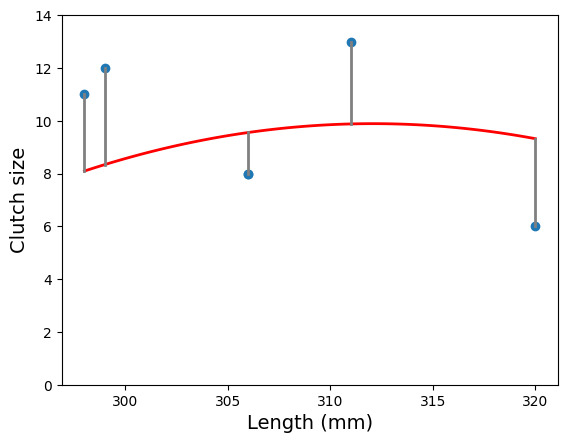

In [14]:
# Display quadratic model and scatter plot of the test set
#Display linear model and scatter plot of the test set
#You'll have to make a change here, since BostonHousing has 506 lines. Generate 15 random indices in the range(len(BostonHousing)).
#Select the corresponding values from x_test,y_test, y_predict.  Then proceeed.

plt.scatter(X_test, y_test)
plt.xlabel("Length (mm)", fontsize=14)
plt.ylabel("Clutch size", fontsize=14)
x = np.linspace(X_test.min(), X_test.max(), 100)
y = (
    poly_reg_model.coef_[2] * x**2
    + poly_reg_model.coef_[1] * x
    + poly_reg_model.intercept_
)

#For the Boston Housing dataset, choose 

plt.plot(x, y, color='red', linewidth=2)
plt.ylim([0, 14])
#blue dots are data points (X_test[i], y_test[i])
for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [15]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

7.905956918573813

In [17]:
# Display RMSE
#metrics.mean_squared_error(y_test, y_pred, squared=False)
metrics.root_mean_squared_error(y_test, y_pred)

2.811753353083057